<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/1_Analysis/9_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 개요


- 일반적으로 통계를 기반으로 하는 분석은 R로 주로 이루어졌고 파이썬이 확산되고 pandas가 활성화되면서 파이썬으로도 분석이 많이 진행됨
- 파이썬의 장점
  - 데이터 분석이라는 분야는 파이썬이라는 바다의 한 파트일 뿐
  - 확장성이 매우 大
  - 분석을 웹하고 연계해서 서비스를 만들고 싶음
    - R에서 웹을? -> 연계성에서 한계점이 존재
    - 파이썬에서 웹을? -> OK : Flask(vs nodejs), Django(vs spring) or GUI(C# 활용, 윈도우 프로그램 exe/msi/dmg로 배포)활용
    - 파이썬이 머신러닝. 딥러닝의 핵심 언어

- 분석의 간단한 일반 절차
  - 6단계: 연구목표 - 데이터수집 - 데이터준비 - 데이터분석 - 예측모델구축(통계/머신러닝/딥러닝) - 시스템통합(산출물제작)
  - 통계모델 => 모델 구축 시 사용한 데이터가 아닌, 한번도 접하지 않은 새로운 데이터를 넣었을 때 예측, 상관분석 등을 통해 나온 결과로 판단


# 분류 분석
- 학습 -> 머신러닝 진행

# 회귀 분석
- 목표
  - (두) 변수 사이의 관계를 통계적인 분석으로 통해 방정식(식)을 구하는 것
  - 해당 식을 통해서 새로운 데이터를 넣으면 답을 예측 可
- 종류
  - 단순 선형 회귀 분석 : Simple Linear regression
  - 다중 회귀(중회귀) 분석 : Multi regression
  - 로지스틱 회귀 분석 : Logisitic regression
    - 범주형 데이터, 확률을 예측하는 분석 -> 지분 계산
    - softmax 함수

## 단순 선형 회귀 분석


### 연구 목표
1. 알코올(독립변수)이 와인 품질(종속변수)에 미치는 영향/상관관계에 대한 분석, 두 변수 간의 관계를 식으로 표현해 그 영향력을 수치화하고 관계를 시각화
2. 개별 독립변수들과 와인 품질에 대해서 1대1로 대응시켜서 어떤 변수가 단순 선형 회귀 분석에 있어서 가장 와인 품질에 영향을 미치는지 분석하고 시각화

### 데이터 준비(1)

In [2]:
# 1. 모듈 가져오기
import pandas as pd
import numpy as np

# 파이썬에서 통계분석에 편리한 도구를 제공하는 모듈, 편리한 통계 분석 도구를 제공하는 패키지
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

'''
R과 관련된 분석 모형 중
  - 검정, 추정
  - 회귀분석
  - 시계열분석
  이런 항목들을 R 스타일로 제공, 방법론이 거의 동일
'''

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 2. 데이터 로드
# 레드와인 품질을 결정하는 변수들에 대한 데이터
# 독립변수(각종 요인) <-> 종속변수(품질)
path = '/content/drive/My Drive/2020_AI_Busan/1_Analysis/data/winequality-red.csv'
# path = './winequality-red.csv'
wine_qu = pd.read_csv( path, sep=";" )

### 데이터 준비(2)

In [4]:
# 3. 데이터 준비
# viewing을 통해 데이터에 대한 통찰
wine_qu.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_qu.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine_qu.shape

(1599, 12)

In [7]:
'''
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
      
'고정 산도', '휘발성 산도', '시민 산', '설탕', 
'염소화합물', '무유황산화물', '총유황산화물', '밀도', 
'pH', '술파테스', '알코올', '품질'

결합산(fixed acid) : 주로 타르타르산(tartaric),사과산(malic)으로 이루어져 있고 와인의 산도를 제어 한다.
휘발산(volatile acidity) : 와인의 향에 연관이 많다.
구연산(citric acid) : 와인의 신선함을 올려주는 역할, 산성화에 연관을 미친다
잔여 설탕(residual sugar) : 와인의 단맛을 올려준다.
염화물(chlorides) : 와인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
황 화합물(free sulfur dioxide, total sulfur, dioxide sulphates)
    : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 
밀도(density) : 바디의 높고 낮음을 표현하는 와인의 무게감을 의미한다.
산성도(pH) : 와인의 신맛의 정도를 나타낸다.
알코올(alcohol) : 와인의 ?과 단맛을 주며 와인의 바디감에 영향을 준다.
'''

wine_qu.columns

# 컬럼의 의미를 이해하고, 컬럼들 중에 독립변수/종속변수 구분 : quality가 종속변수

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine_qu.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# 컬럼명이 공백 有 -> 향후에 다소 불편함 존재 可
# 공백을 "_"로 채움
# 직접 변경하는 방법 사용 -> 패턴을 작성할 수 있다면 가능(함수화시켜서 처리)

wine_qu.rename( columns=lambda x:x.replace(' ', '_'), inplace=True )
wine_qu.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 기본 용어 이해
- 단순 선형 회귀 분석
- 명제
  - 인구가 x명일 때 필요한 전력량은? -> y
  - 흡연량이 x일 때 폐암 발생률은? -> y
  - 키가 x일 때 몸무게는? -> y
- 식
  - y = α + βx (α : y절편, 상수, 편향(딥러닝에서) -> 특정 방향으로 보정 / β : 기울기)
- 용어
  - (정규) 최소 제곱
    - 예측한 y의 값, 실제 y값 사이의 수직거리 : 오차
    - 오차를 제곱하여(∵ 음수가 존재 可) 총합이 최소가 되게 α, β를 조정(계산)
  - 확률 오차(잔차)
    - 모델이 예측한 결과와 실제 결과의 편차
    - 이 값을 최소로 하는 것이 목표
  - 문제점
    - 다중 공선성 -> 통계 분석 요약표에 해당 지표가 등장
      - 독립변수가 많아지면 회귀식의 성능은 좋아짐(회귀계수가 희소해짐)
      - 해결 방안
        - 상관계수가 높은 변수 중 종속변수에 가장 큰 영향을 미치는(상관성이 높은) 변수 한 개만 남기고, 나머지는 삭제
        - 클러스터링, 차원축소 등의 방법도 可 -> 머신러닝
  - 예측
    - 새로운 데이터 x를 방정식에 넣어서 y 도출
  - 평가
    - 예측값과 실제값을 가지고 계산
    - 통계 : 평균제곱근오차라는 지표 사용 -> RMSE, MSE -> 0에 가까울수록 성능 좋음 -> 조정
    - 머신러닝 : 최적화 기법을 써서 처리(하이퍼파라미터튜닝) -> 조정
    - 딥러닝 : 가중치(weight) 조정 통해 성능 조정
  - 상관계수
    - 0.1 ~ 0.3 : 약한 상관관계
    - 0.3 ~ 0.5 : 중간 상관관계
    - 0.5 ~　　: 강한 상관관계
      - 사람과 연관된 데이터는 0.5 이상이면 강한 상관관계
      - 기계 등 연관된 데이터는 0.7 이상을 강한 상관관계
  - 부호
    - 방향성, 비례적, 반비례적
  - 두 변수 간의 관계를 빠르게 판단하는 방법
  

### stats_models를 이용한 분석

In [10]:
wine_qu.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# 알코올
wine_qu['alcohol'][:3], np.max(wine_qu['alcohol']), np.min(wine_qu['alcohol'])

(0    9.4
 1    9.8
 2    9.8
 Name: alcohol, dtype: float64, 14.9, 8.4)

In [12]:
# 품질
wine_qu['quality'][:3], np.max(wine_qu['quality']), np.min(wine_qu['quality'])

(0    5
 1    5
 2    5
 Name: quality, dtype: int64, 8, 3)

In [13]:
# 방정식의 상수 구성을 위해  0이 아닌 값으로 설정
sm.add_constant( wine_qu['alcohol'] )

,const,alcohol
0,1.0,9.4
1,1.0,9.8
2,1.0,9.8
3,1.0,9.8
4,1.0,9.4
...,...,...
1594,1.0,10.5
1595,1.0,11.2
1596,1.0,11.0
1597,1.0,10.2


In [14]:
# model : 예측 모델, 방정식을 훈련을 통해 생성(내부적)
# OLS : Ordinary Least Squares, 최소 제곱법을 이용하여 데이터를 학습하고 방정식을 생성하고 예측모델까지 구축
# 독립변수 : 알콜, 종속변수 : 품질
# 방정식에서 상수를 계산하기 위해 데이터에 상수 파트를 추가
model = sm.OLS( wine_qu['quality'], sm.add_constant( wine_qu['alcohol'] ) )

In [15]:
# 학습
result = model.fit()

In [16]:
# 평가 요약
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.83e-91
Time:                        04:52:00   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.83e-91
Time:                        04:52:03   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 해석

- const
  - y절편, 상수, 편향
  - 전체 그래프를 y축을 기준으로 상향 혹은 하향시켜서 -> "최소제곱값" or "잔차(잔차이, 작은 차이)" 최소로 되게 조정
  - 개별 데이터의 오차유리 최소가 되도록 조정
  - 여기서는 1.8750
- alcohol        
  - 기울기 (독립변수로 보이지만)
  - 여기서는 0.3608

- 식
  - y = 1.8750 + 0.3608 * x  

---

- R-squared
  - R²
  - 결정계수의 일반적인 기호
  - 여기서는 0.227 -> 알코올이 와인 품질에 대해서 22.7%만큼 설명
  - 합산을 기준으로 계산, 합산으로 계산
  - 0.7 이상이여야 높은 상관관계를 가짐
- Adj. R-squared
  - 조정 R²
  - 평균으로 계산
  - 여기서는 0.226
- P>|t|
  - P-value(유의 확률)
  - 대상 : 통계적 가설 검정 분야에서 사용하는 지표
  - 통계적으로 해석해보면, '특정값 0.05 혹은 0.01보다 P-Value가 작으면 귀무가설을 기각한다'는 명제
  - 가설 검증
    - 예
      - 범죄사건 발생, 용의자 검거
        - 귀무가설 : 형사가 '이 용의자가 범죄를 저질렀다'고 추청한다면 
        - 대립가설(귀무가설에 대비) : 용의자는 무죄
    - 여기서는 
      - const : 0.000
      - alcohol : 0.000
        - 0.01 or 0.05보다 P-Value가 작다
        - 귀무가설 기각
        - 현재 귀무가설 : 알코올은 와인 품질에 영향을 끼침
        - 기각 : 알코올은 와인 품질에 영향을 미치지 X

---

- VIF(Variance Inflation Factors)
  - 다중 공선성을 판단하기 위한 자료
  - 1/(1-R²), ... : 현재 분석 상황이 단순 선형 회귀 분석이므로 해당 지표는 검토할 필요 X -> 다중 회귀 시 검토
  - 1 ~ 10 사이의 값
- AIC
  - 수치의 양이 중요한 게 아니라, 값의 변화가 중요. 즉, 상대적 크기가 중요

In [18]:
# R제곱, 수정R제곱, 예측값(y, 종속변수)
result.rsquared, result.rsquared_adj, result.predict(), result.aic

(0.2267343681127545,
 0.22625016921990082,
 array([5.26688748, 5.41122419, 5.41122419, ..., 5.84423431, 5.55556089,
        5.84423431]),
 3446.1135094800384)



```
OLS 회귀 결과
===================================================== =============================
뎁 변수 : 품질 R 제곱 : 0.227
모델 : OLS Adj. R 제곱 : 0.226
방법 : 최소 제곱 F- 통계량 : 468.3
날짜 : 2020 년 7 월 22 일 수요일 (F- 통계) : 2.83e-91
시간 : 03:20:38 로그 가능성 : -1721.1
관찰 결과 : 1599 AIC : 3446.
Df 잔차 : 1597 BIC : 3457.
Df 모델 : 1
공분산 유형 : 비 강성
===================================================== =============================
                 coef std err t P> | t | [0.025 0.975]
-------------------------------------------------- ----------------------------
const 1.8750 0.175 10.732 0.000 1.532 2.218
알코올 0.3608 0.017 21.639 0.000 0.328 0.394
===================================================== =============================
옴니버스 : 38.501 더빈-왓슨 : 1.748
프로브 (옴니버스) : 0.000 Jarque-Bera (JB) : 71.758
기울기 : -0.154 프로브 (JB) : 2.62e-16
첨도 : 3.991 Cond. 104 호
===================================================== =============================
```



In [19]:
# 상수, 기울기
result.params

const      1.874975
alcohol    0.360842
dtype: float64

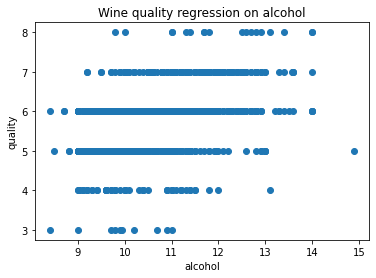

In [20]:
# 시각화
# 원데이터를 산포도로 시각화
plt.scatter( wine_qu['alcohol'], wine_qu['quality'], label='real data' )

plt.title('Wine quality regression on alcohol')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

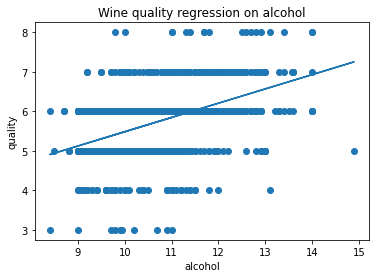

In [21]:
plt.scatter( wine_qu['alcohol'], wine_qu['quality'], label='real data' )

# 학습된 형태로 선형 회귀 결과를 드로잉
# x대비 방정식에 따라 y를 드로잉 -> 선형 차트

# 방정식으로 표현
# plt.plot( wine_qu['alcohol'], result.params[0]+result.params[1]*wine_qu['alcohol'], label='reg output' )

# 방정식을 통해 나온 예측값으로 표현 -> 결론적으로 위와 같은 이야기
plt.plot( wine_qu['alcohol'], result.predict(), label='predict' )

plt.title('Wine quality regression on alcohol')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

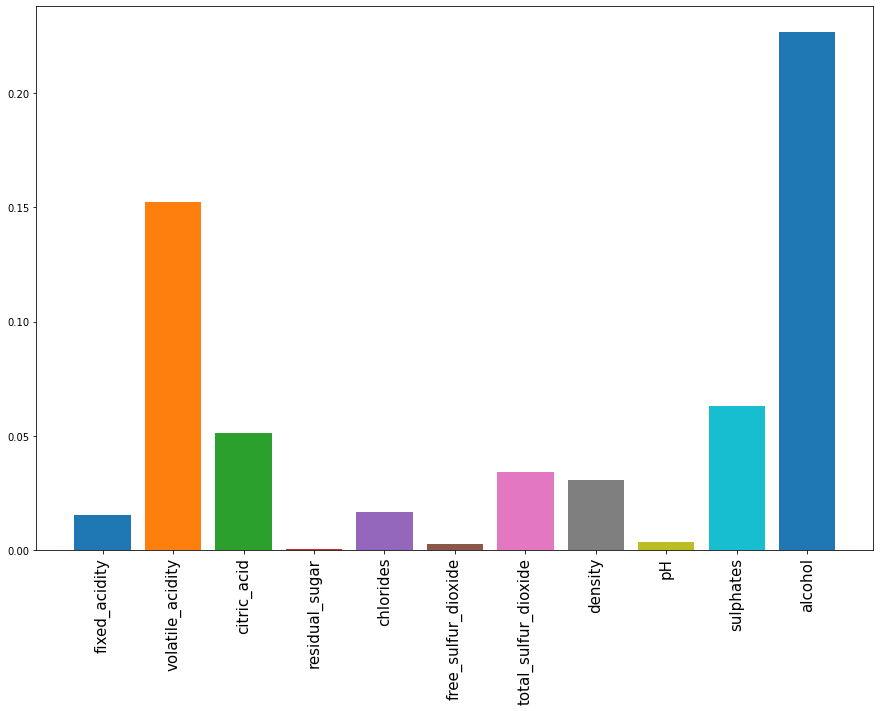

In [22]:
# 다른 변수들과 품질에 대한 선형 회귀 분석 후 R² 기준으로 바차트를 그리시오
# x축은 독립변수
# y축은 R²값
# 데이터 상에 존재하는 모든 독립변수들 중에 품질에 영향을 미치는 혹은 상관관계가 가장 높은 독립변수를 구할 수 있음
# 단순 선형 회귀 분석 기준에서 판단 

# 1. 모양
plt.figure( figsize=(15,10) )

for col in wine_qu.columns[:-1] :
  # col에 해당되는 독립변수에 데이터를 가지고 단순 선형 회귀 분석을 위한 모델 생성
  model = sm.OLS( wine_qu['quality'], sm.add_constant( wine_qu[ col ] ) )
  # 학습
  result = model.fit()
  # 2. 플로팅
  plt.bar( [ col ], result.rsquared, label=col)
  # x축의 이름이 수평으로 되어 있어서 겹치는 부분 존재 -> 회전 필요


# 3. 보여라
# plt.legend()
# x축 레이블 회전
plt.xticks( fontsize=15, rotation=90 )
plt.show()

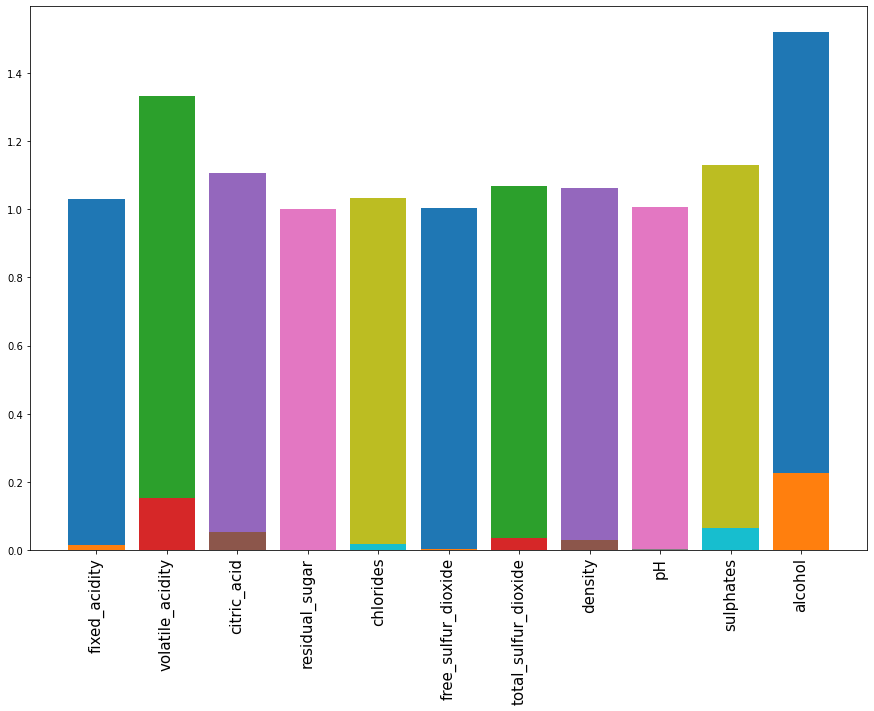

In [23]:
# vif를 독립변수별로 계산해서 바차트 위에 연결된 바차트로 그리시오

plt.figure( figsize=(15,10) )

for col in wine_qu.columns[:-1] :
  model = sm.OLS( wine_qu['quality'], sm.add_constant( wine_qu[ col ] ) )
  result = model.fit()
  vif = 1 / (1 - result.rsquared)
  # 값이 연속적이여야 의미 有, 여기서는 vif를 그냥 이런 형식으로만 표현
  plt.bar( col, vif, label=col, bottom=result.rsquared)
  plt.bar( col, result.rsquared, label=col)

plt.xticks( fontsize=15, rotation=90 )
plt.show()

### 직접 구현을 통한 분석


In [24]:
from sklearn.model_selection import train_test_split  # 데이터를 훈련용, 테스트용으로 분리
from sklearn.metrics import r2_score                  # 머신러닝에서 성능평가도구, R²을 구하기 위해서 획득

In [25]:
# 데이터를 나눔 -> 통계모델 7:3, 머신러닝 75:25 (일반적으로)
# X_ : 독립변수(feature, 특성), y_ : 종속변수(label, class, 정답)
# 정답이 수치이고, 소수점까지 표현을 하니까 회귀 분석이 적합
# 언제 구동시켜도 항상 같은 데이터만 모여서 분류되게 하고 싶다면(실험환경 통제) -> 난수 고정
# 난수 고정 -> 난수의 seed를 고정
X_train, X_test, y_train, y_test = train_test_split( 
    wine_qu['alcohol'], wine_qu['quality'], train_size=0.7, random_state=42
    )

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119,), (480,), (1119,), (480,))

In [27]:
1119/480, 7/3
# 두 값이 동일 -> 데이터가 7:3으로 분할됨을 의미

(2.33125, 2.3333333333333335)

In [28]:
type(X_train)

pandas.core.series.Series

In [29]:
# df로 복원
X_train = pd.DataFrame( X_train )
X_test = pd.DataFrame( X_test )
y_train = pd.DataFrame( y_train )
y_test = pd.DataFrame( y_test )

In [30]:
X_train.head(2)

,alcohol
925,11.0
363,10.2


In [31]:
# 평균
alcohol_mean = round( np.mean(X_train['alcohol']), 2 )
quality_mean = round( np.mean(y_train['quality']), 2 )

alcohol_mean, quality_mean

(10.42, 5.62)

In [32]:
# 회귀 모델의 계수를 계산하기 위해
# 분산 : variance
#        확률변수가 기대값으로부터 얼마나 떨어진 곳에 데이터가 분포하는지를 가늠하는 수치
#        (개별값(개별데이터) - 평균)^2의 총합 -> 통상 소수점 2자리 표현
# 알콜 데이터의 분산(독립변수의 분산)
alcohol_variance = round( sum( (X_train['alcohol'] - alcohol_mean)**2 ), 2)
# 품질 데이터의 분산(종속변수의 분산)
quality_variance = round( sum( (y_train['quality'] - quality_mean)**2 ), 2)

alcohol_variance, quality_variance

# 표준편차 : 분산의 제곱근, 데이터가 얼마나 퍼져있는지 보는 지표로 사용됨
# 확률변수 : 확률적인 과정에 따라 값이 결정되는 변수 -> 지금은 개별 데이터로만 생각하고, 차후 기초 용어에서 정리

(1255.6, 737.1)

In [33]:
# 공분산 : covariance
# 2개 변수 중 하나의 값이 상승하면 다른 값도 상승하는가? 그렇다면 공분산은 양수
# 2개 변수 중 하나의 값이 상승하면 다른 값은 하강하는가? 그렇다면 공분산은 음수
# 상관관계의 부호에 대한 이야기
# (알콜개별값 - 알콜평균)*(품질개별값 - 품질평균)의 총합 -> 소수점 2자리
covariance = round ( np.sum( ( X_train['alcohol'] - alcohol_mean )*( y_train['quality'] - quality_mean ) ), 2 )
covariance

473.34

In [34]:
# y = a + bx
#######################################################
# b
# 기울기
# 공분산 / 알코올분산
#######################################################
# a
# 상수, 편향, y절편
# 품질의 평균 - (공분산 / 알코올분산) * 알코올평균

b = covariance / alcohol_variance
a = quality_mean - b * alcohol_mean

a, b

(1.6918359350111505, 0.37698311564192416)

In [35]:
# 방정식, 독립변수와 종속변수 간의 관계를 규정하는 선형 회귀를 설명하는 식을 만들었으니, 예측 可
# X_test -> 방정식을 만들 때 사용하지 않은 데이터 -> 한번도 접하지 않은 데이터
y_test['pred'] = a + b * X_test['alcohol']
# y_test['quality']과 y_test['pred']이 얼마나 일치하는가 -> 정확도(분류), 회귀에서는 다른 지표로 판단
# R^2으로 판단
y_test.head(2)

,quality,pred
803,6,5.310874
124,5,5.273176


In [36]:
# R 제곱 통계량 계산
# r제곱 = 1 - ( (합산((실제품질값-예측값)제곱) ) / ( (합산((실제품짌값-품질평균값)제곱) )
# R_sqrd = 1 - ( (sum(y_test['quality']-y_test['pred']))**2 ) / y_test_mean  )
tmp1  = y_test['quality']-y_test['pred']
tmp1  = tmp1**2
tmp1  = sum(tmp1)

tmp2  = y_test['quality']-np.mean(y_test['quality'])
tmp2  = tmp2**2
tmp2  = sum(tmp2)

R_sqrd  = 1 - (tmp1/tmp2)
round(R_sqrd, 4)
# 0~ 1사이로 나와야 한다. 

0.185

### numpy를 이용한 분석


In [37]:
import numpy as np

In [38]:
tmp = np.corrcoef( wine_qu['alcohol'], wine_qu['quality'] )
tmp

array([[1.        , 0.47616632],
       [0.47616632, 1.        ]])

In [39]:
# R제곱값
round(np.sum(np.tril(tmp, k=-1))**2, 4)

0.2267

In [40]:
# 함수
fp1 = np.polyfit(wine_qu['alcohol'], wine_qu['quality'], 1)
fp1

# 기울기, y절편

array([0.36084177, 1.87497489])

In [41]:
f1 = np.poly1d( fp1 )

In [42]:
# y_test['pred2'] = f1( X_test['alcohol'] )
tmp_pred = f1( wine_qu['alcohol'] )
tmp_pred.shape

(1599,)

In [43]:
tmp_pred[:2]

array([5.26688748, 5.41122419])

In [44]:
# wine_qu['quality'], tmp_pred 2개를 가지고 R제곱 => 0.2267 나오면 OK
# R_sqrd=1-( sum( ()**2 ) / sum( ()**2 ) )
tmp1  = wine_qu['quality']-tmp_pred
tmp1  = tmp1**2
tmp1  = sum(tmp1)

tmp2  = wine_qu['quality']-np.mean(wine_qu['quality'])
tmp2  = tmp2**2
tmp2  = sum(tmp2)

R_sqrd  = 1 - (tmp1/tmp2)
round(R_sqrd, 4)

0.2267

### 머신러닝을 이용한 분석 - 생략

## 다중 회귀 분석
- 여러 개의 독립 변수를 가지고 회귀 분석
- 방정식
  - y = α + β1x1 + β2x2 + ... + βnxn
  - 골프 클럽의 속성, 타격감, 방향성, 브랜드, 서비스, ...
    - 골프 클럽의 만족도는 어떤 독립변수들에 의해서 영향을 받는가?
    - y = α + β1 * 타격감 + β2 * 방향성 + ... + βn * 브랜드
    - β1 + β2 + ... + βn = 1.0은 아님
- 변수 선택 방법
  - 제공된 데이터 중에서 여러 개의 독립변수들 중 영향성이 없는 독립변수를 제거하거나, 조합으로 가장 높은 성능을 내는 독립변수들을 사용해 처리
    - 전진 선택법 
      - 빈 대상에서 독립 변수를 추가해가면서 체크하고 성능이 좋은 쪽으로 남기는 방법
    - 변수 소거법(후진 제거법) 
      - 전체 변수를 대상
      - 미리 설정한(가정한, 임계값) 통계 수치(잔차, 다중공선성, ...)를 만족할 때까지, 반복적으로 변수를 제거해가면서 학습하고 평가하여 로그 저장 -> 최적 조합 확인 可
      - R제곱값 > 0.5 또는 0.7
      - 다중공선성값
        - 1~10 값 존재, 1은 거의 무한대로 감
        - 1에 가까우면 값이 공선성이 작음 = 좋은 평가 결과
        - 값이 커지면, 5 이상 10까지 가버림 = 나쁜 평가 결과

In [45]:
wine_qu.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
import seaborn as sns

In [47]:
# 변수들 간의 관계를 시각화
# 5개 컬럼을 대상으로 비교
cols = ['volatile_acidity', 'sulphates', 'chlorides', 'alcohol','quality']
cols

['volatile_acidity', 'sulphates', 'chlorides', 'alcohol', 'quality']

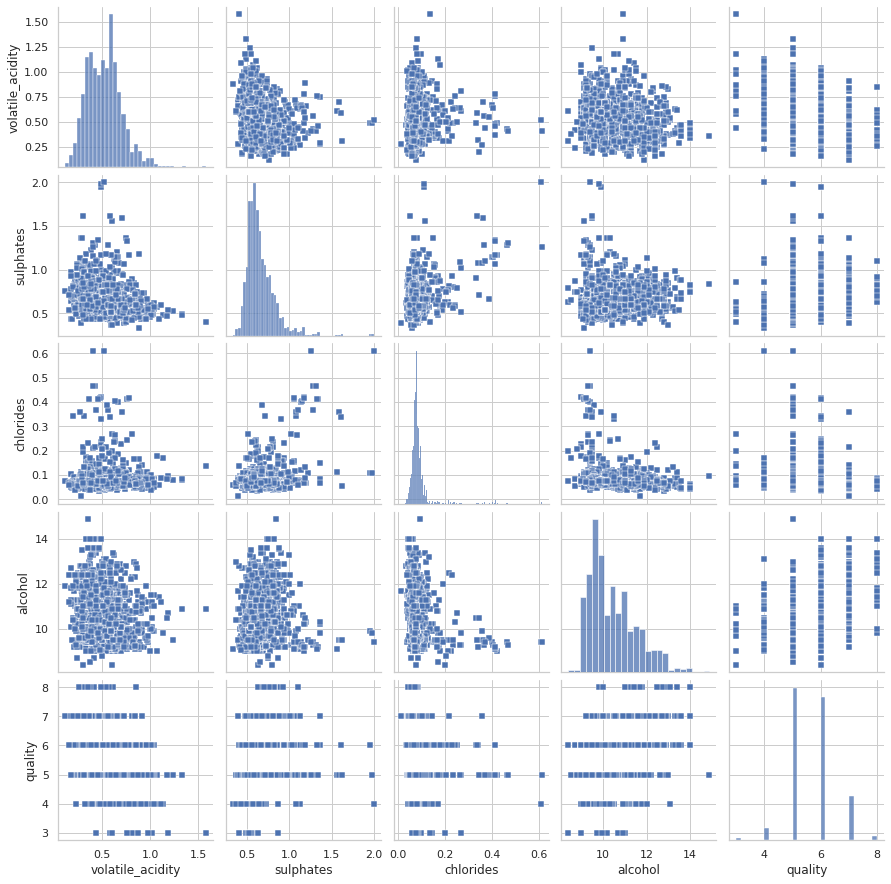

In [49]:
# 산포행렬
sns.set(style='whitegrid')
sns.pairplot(wine_qu[ cols ], height =2.5, markers="s")
plt.show()

# 본 데이터는 6개의 품질을 가진 와인을 무작위로 섞어서 데이터를 구성한 것으로 보임

In [50]:
wine_qu['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [51]:
# 각 품질 당 데이터의 수는?
# 품질이 5인 데이터 x개, ...

wine_qu.quality.value_counts()

# 데이터의 대부분은 5, 6에 편중되어 있음 (약 82%)
# 보다 정확하게 하려면 품질 3 , 4, 7, 8의 데이터가 보완되서 균형을 유지해주어야 적합한 것으로 보임
#    -> 보완은 어려우니 그대로 진행
#    -> 레벨 5, 6만 모아서 분석해보는 것도 정확할 듯

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [52]:
wine_qu[ cols ].values

array([[ 0.7  ,  0.56 ,  0.076,  9.4  ,  5.   ],
       [ 0.88 ,  0.68 ,  0.098,  9.8  ,  5.   ],
       [ 0.76 ,  0.65 ,  0.092,  9.8  ,  5.   ],
       ...,
       [ 0.51 ,  0.75 ,  0.076, 11.   ,  6.   ],
       [ 0.645,  0.71 ,  0.075, 10.2  ,  5.   ],
       [ 0.31 ,  0.66 ,  0.067, 11.   ,  6.   ]])

In [53]:
# numpy를 이용한 상관계수 획득
corr_tmp = np.corrcoef(wine_qu[ cols ].values)
corr_tmp

# 독립변수 기준으로 상관계수값이 나와야 하는데 데이터 중심으로 나옴
# 컬럼과 데이터를 맞바꿔서 수행

array([[1.        , 0.9995651 , 0.99969912, ..., 0.99936467, 0.99895203,
        0.9988371 ],
       [0.9995651 , 1.        , 0.99993997, ..., 0.99823276, 0.9995736 ,
        0.99741845],
       [0.99969912, 0.99993997, 1.        , ..., 0.99871118, 0.99972031,
        0.99805661],
       ...,
       [0.99936467, 0.99823276, 0.99871118, ..., 1.        , 0.99812814,
        0.99988737],
       [0.99895203, 0.9995736 , 0.99972031, ..., 0.99812814, 1.        ,
        0.99755305],
       [0.9988371 , 0.99741845, 0.99805661, ..., 0.99988737, 0.99755305,
        1.        ]])

In [54]:
corr_tmp.shape

(1599, 1599)

In [55]:
wine_qu[ cols ].values.T

array([[ 0.7  ,  0.88 ,  0.76 , ...,  0.51 ,  0.645,  0.31 ],
       [ 0.56 ,  0.68 ,  0.65 , ...,  0.75 ,  0.71 ,  0.66 ],
       [ 0.076,  0.098,  0.092, ...,  0.076,  0.075,  0.067],
       [ 9.4  ,  9.8  ,  9.8  , ..., 11.   , 10.2  , 11.   ],
       [ 5.   ,  5.   ,  5.   , ...,  6.   ,  5.   ,  6.   ]])

In [56]:
wine_qu[ cols ].values.T.shape

(5, 1599)

In [57]:
corr_tmp = np.corrcoef(wine_qu[ cols ].values.T)
corr_tmp

array([[ 1.        , -0.26098669,  0.06129777, -0.20228803, -0.39055778],
       [-0.26098669,  1.        ,  0.37126048,  0.09359475,  0.25139708],
       [ 0.06129777,  0.37126048,  1.        , -0.22114054, -0.12890656],
       [-0.20228803,  0.09359475, -0.22114054,  1.        ,  0.47616632],
       [-0.39055778,  0.25139708, -0.12890656,  0.47616632,  1.        ]])

In [58]:
corr_tmp.shape

(5, 5)

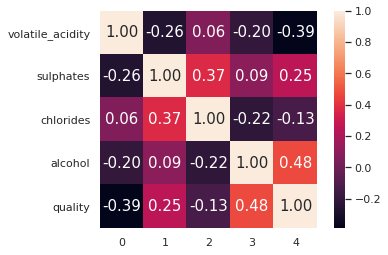

In [59]:
# 히트맵으로 확인
sns.heatmap(
    corr_tmp, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols
    )
plt.show()

In [60]:
# 실제 변수를 후진 제거법으로 처리하면서 성능 확인
#    -> 조합을 찾아라
# R제곱이 높으면서, VIF가 낮은 조합 찾기 -> 사용할 독립변수 리스트

# 대상 컬럼
columns = wine_qu.columns[:-1]

In [61]:
# x, 독립변수 데이터 -> DataFrame(2D)
target_df = wine_qu[columns]
target_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [62]:
# y, 종속변수 데이터 -> Series(1D)
y_data = wine_qu['quality']
y_data.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [63]:
import random as r

In [64]:
for n in range (10) :
  print(r.randint(0, 100))

76
26
98
2
99
62
31
77
57
59


In [65]:
# 언제 구동하더라도 난수값이 동일한 패턴으로 나오게 하고 싶음
# 동일한 순서대로 난수가 나오게 하고 싶음
# 이런 난수를 가지고 셔플해서 동일하게 항상 데이터를 구성하고 싶다면 난수의 시드를 고정해라
#    -> 아무런 설정하지 않으면 seed는 현재 시간(항상 바뀜, 항상 흐름 -> 동일 패턴 나올 수  X)

r.seed = 0
for n in range (10) :
  print(r.randint(0, 100))

19
21
14
81
56
10
47
81
8
50


In [66]:
# 데이터 통계 모델이므로, 훈련:테스트 = 7:3
# 단순회귀만 

# X_train, X_test, y_train, y_test = train_test_split(target_df, y_data, train_size=0.7, random_state=1) 로 써도 OK
# random_state = 42 -> 데이터 셔플할 때 사용하는 재료의 난수값을 42 넣어서 나오는 난수의 패턴으로 구성 = 시드를 고정
# 어떤 독립변수가 성능 향상에 영향을 미쳤는지 체크 可
#    = 실험환경 통제
X_train, X_test, y_train, y_test = train_test_split(target_df, y_data, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [67]:
# 회귀식의 상수를 만들기 위해 0이 아닌 값을 부여
# augmentation : 수식을 간단하게 구성하기 위해, 0이 아닌 상수값을 부여하는 행윈
X_train_added = sm.add_constant(X_train)
X_train_added.head()

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
925,1.0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,1.0,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,1.0,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,1.0,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,1.0,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8


In [68]:
# 독립변수가 전체 다 적용(11개)
full_model = sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()

In [69]:
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          8.34e-100
Time:                        04:53:46   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626 

In [70]:
# 후진 제거법 사용
# 1차로 수행할 방법 : 맨뒤에서(or 맨앞에서) 하나씩 교대로 제거
# 1회 수행 시 독립변수는 10개 -> 9개 -> 8개씩 -> ... -> 2개씩, 11개 해결

# 순환하면서 컬럼을 10개씩 구성
print(f'{"제거된 컬럼":25} {"R제곱값":25} {"다중공선성":25}')
print("="*77)
for idx in range(len(columns)) :
  # 독립변수 원본을 리스트로 생성 -> 사본
  tmp = list(columns)
  # 반복적으로 해당 위치에 해당되는 컬럼 제거
  # rm_col : 제거된 컬럼명
  rm_col = tmp.pop(idx)
  # 다중 회귀 모델 생성
  m_model = sm.OLS(y_train, sm.add_constant(X_train[tmp]))
  m_model_res = m_model.fit()
  # 다중공선성을 점검하는 지표
  vif = 1/(1-m_model_res.rsquared)
  print(f'{rm_col:25} {m_model_res.rsquared:25} {vif:25}')
  # print(tmp)

제거된 컬럼                    R제곱값                      다중공선성                    
fixed_acidity                   0.36085686340584544        1.5645947562368703
volatile_acidity                  0.327878240854684        1.4878256601476803
citric_acid                     0.36006386105865407        1.5626559263465134
residual_sugar                   0.3610919733704998        1.5651705070531152
chlorides                       0.35474515532946393        1.5497752682672148
free_sulfur_dioxide              0.3595183344246542         1.561324943004728
total_sulfur_dioxide             0.3531997417016609        1.5460723572233737
density                          0.3610217765909469        1.5649985607722856
pH                               0.3600613329280392         1.562649752945075
sulphates                        0.3403762077814967         1.516015661952875
alcohol                          0.3116341739573988        1.4527159283152917


In [71]:
a = list(columns)
# 맨 뒤에서 빠진다
# a.pop()
# a.pop( 빼고 싶은 컬럼의 인덱스값을 넣으면 된다 )
# 인덱스만 자동으로 게산되면 된다 0 ~ len( columns )-1 <= 연속으로 생성
a.pop( 0 )
# a[:]
a

['volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [72]:
#range( 0, len( columns ) )
range( len( columns ) )

range(0, 11)

- 독립 변수 6개 혹은 5개 정도의 조합으로 구성하여 로테이션 후 성능 비교를 수행하시오
- 최초 대상은 11개였고 여기서 5개 혹은 6개로 택일하여 중복 없는 조합을 만들고 그것을 이용하여 로테이션 학습 후 R제곱의 최대값과 VIF의 최소값을 찾으시오
- volatile acidity, alcohol은 고정으로 두고 5개 조합으로 하고, 나머지 3자리를 로테이션

In [73]:
# 단순 회귀에서 점수가 높았던 변수 6개를 모아서 (5,6등에 위치한 변수 조합) 2조합으로 구성하여
# 5개로 구성해서 비교

In [74]:
# 조합 만들기
# itertools or 재귀적 호출, 기타 로직 등

In [75]:
from itertools import permutations, combinations

In [76]:
targets = [1, 2, 3]
[item for item in list( permutations (targets) )]

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [77]:
[item for item in list(combinations(targets, 2))]

[(1, 2), (1, 3), (2, 3)]

In [78]:
# 5개
five_cols = [item for item in list(combinations(columns, 5))]
len(five_cols)

462

In [79]:
print(f'{"제거된 컬럼":25} {"R제곱값":25} {"다중공선성":25}')
print("="*77)
for idx, cols in enumerate(five_cols) :
  m_model = sm.OLS(y_train, sm.add_constant(X_train[ list(cols) ]))
  m_model_res = m_model.fit()
  vif = 1/(1-m_model_res.rsquared)
  print(f'{idx:25} {m_model_res.rsquared:25} {vif:25}')

제거된 컬럼                    R제곱값                      다중공선성                    
                        0       0.15854632261382606        1.1884195492570928
                        1       0.15239321656369675        1.1797923512903894
                        2        0.1790941829886893        1.2181665414928124
                        3       0.22626474425712018        1.2924317362789401
                        4       0.15465558141225078        1.1829497871064456
                        5       0.17125187728549862        1.2066392340347947
                        6        0.3309731293551389        1.4947082753733356
                        7         0.162342228881869        1.1938049576799958
                        8        0.1892278073661674        1.2333920786694124
                        9        0.2161471164651778        1.2757495966468249
                       10       0.16177075214868664         1.192991061291841
                       11       0.19923726654039475         1.24

In [80]:
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )
# r제곱이 가장 클 때 
best_r_idx   = -1
best_rqsrd   = -1
best_vif2    = -1
# vif가 가장 작을 때
best_v_idx   = -1
best_rqsrd2  = -1
best_vif     = 10
for idx, cols in enumerate(five_cols):  
  m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(cols) ] )  )
  m_model_res = m_model.fit()
  # 다중공선성을 점검하는 지표
  vif = 1/(1-m_model_res.rsquared)
  # print( f'{idx:20} {m_model_res.rsquared:10} {vif:10}' )
  # 가장 높은 값일때 기록
  # r제곱
  if m_model_res.rsquared > best_rqsrd:    # 현재 r제곱이, 현재 최고 R제곱보다 크면 갱신
    best_rqsrd = m_model_res.rsquared
    best_r_idx = idx
    best_vif2  = vif
  
  if vif < best_vif:    # 현재 vif가 현제 최고 vif값보다 작으면 갱신
    best_vif   = vif
    best_v_idx = idx
    best_rqsrd2= m_model_res.rsquared

# 결과
print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif2, five_cols[best_r_idx] )
print( "VIF   기준",  best_v_idx, best_rqsrd2, best_vif, five_cols[best_v_idx] )

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
R제곱 기준 316 0.3546389529218342 1.549520232941609 ('volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates', 'alcohol')
VIF   기준 142 0.03198370334263745 1.0330404596008143 ('fixed_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'pH')


In [81]:
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )

best_r_idx   = -1
best_rqsrd   = -1
best_vif2    = -1
best_v_idx   = -1
best_rqsrd2  = -1
best_vif     = 10

for n in range (2, len(columns)) :
  five_cols = [item for item in list(combinations(columns, n))]

  for idx, cols in enumerate(five_cols):  
    m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(cols) ] )  )
    m_model_res = m_model.fit()

    vif = 1/(1-m_model_res.rsquared)

    if m_model_res.rsquared > best_rqsrd:
      best_rqsrd = m_model_res.rsquared
      best_r_idx = idx
      best_vif2  = vif
    
    if vif < best_vif:
      best_vif   = vif
      best_v_idx = idx
      best_rqsrd2= m_model_res.rsquared

print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif2, n )
print( "VIF   기준",  best_v_idx, best_rqsrd2, best_vif, n )

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
R제곱 기준 7 0.3610919733704998 1.5651705070531152 10
VIF   기준 31 0.0007393019108062893 1.0007398488824988 10


In [82]:
# R제곱값이 0.36이므로 독립변수 10개가 종속변수(품질)에 영향을 미치는 비율, 혹은 설명할 수 있는 비율은 35%
# VIF는 1.57이므로 회귀계수의 희소성 문제는 없음
# 독립변수와 종속변수 간의 상관성은 없다 or 약하다고 해석

In [83]:
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )

best_r_idx   = -1
best_rqsrd   = -1
best_vif2    = -1
best_n1 = 0

best_v_idx   = -1
best_rqsrd2  = -1
best_vif     = 10
best_n2 = 0

for n in range (2, len(columns)) :
  five_cols = [item for item in list(combinations(columns, n))]

  for idx, cols in enumerate(five_cols):  
    m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(cols) ] )  )
    m_model_res = m_model.fit()

    vif = 1/(1-m_model_res.rsquared)

    if m_model_res.rsquared > best_rqsrd:
      best_rqsrd = m_model_res.rsquared
      best_r_idx = idx
      best_vif2  = vif
      best_n1 = n
    
    if vif < best_vif:
      best_vif   = vif
      best_v_idx = idx
      best_rqsrd2= m_model_res.rsquared
      best_n2 = n

print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif2, best_n1)

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
R제곱 기준 7 0.3610919733704998 1.5651705070531152 10


In [84]:
# best_n1아 10이므로 마지막에 세팅된 조합 five_cols에서 독립변수 조합 확인
five_cols[ best_r_idx ]

('fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [85]:
# 만약 0.7이상이 된다면 => 예측을 수행하고, R제곱을 구해서 비교를 해야한다
# 예측을 수행 => 한번도 접하지 않은 데이터를 이용하여 예측
# five_cols[ best_r_idx ] => 모든 조합의 평가후 최고 베스트 R제곱을 만들어낸 독립변수조합
m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(five_cols[ best_r_idx ]) ] )  )
m_model_res = m_model.fit()

In [86]:
m_model_res.predict()

array([6.35962957, 5.97782255, 5.67301578, ..., 5.00414069, 6.65121347,
       6.78462001])

In [87]:
# 현재 가장 좋은 점수를 받은 모델을 생성
# 신규 데이터 넣어서 예측
# X_test
# 모델 만들 때 사용했던 칼럼 목록
target_cols = list(five_cols[ best_r_idx ])
# 예측할 때 데이터도 동일하게 맞춰줌
y_pred = m_model_res.predict( sm.add_constant(X_test[target_cols]) )

In [88]:
# 모델의 r제곱과, 예측한 결과를 가진 r제곱 간의 비교
# y_pred, y_test
# 일종의 평가도구
from sklearn.metrics import r2_score
r2_score(y_test, y_pred), m_model_res.rsquared
# 성능은 유사하게 나옴 -> 성능평가 수행, 검증

(0.3505201203769094, 0.3610919733704998)

# 범주형 데이터를 수치화 처리
- 회귀 계산을 하려면 데이터는 수치가 되어야 하므로 문자열 데이터를 수치로 바꿔주는 처리가 필요
- 원-핫인코딩(대표 처리 방식)
  - df에서는 더미변수(이항(1 or 2)으로 처리)

In [89]:
# 더미 데이터 샘플
dic = {
    'A' : list('helhelhh')
}

df = pd.DataFrame(dic)
df

,A
0,h
1,e
2,l
3,h
4,e
5,l
6,h
7,h


In [90]:
# 데이터의 성분이 문자열 -> 회귀 X -> 수치로 변환
df.dtypes
# 수치로 변환하기 위해 0, 1을 이용해서 표현
df.A.unique()

'''
'h' -> 1 0 0
'e' -> 0 1 0 
'l' -> 0 0 1
'''

# 수치로 변환되었음, 값이 0과 1로 표현되었으므로 머신러닝 학습 시 성능이 좋음
# 컬럼(특성)의 수가 1개에서 3개로 늘어남 -> 연산의 수 증가
# 이렇게 변환할 수 있는 도구를 df에서 수행

"\n'h' -> 1 0 0\n'e' -> 0 1 0 \n'l' -> 0 0 1\n"

In [91]:
# 더미 파생 변수 만들기
# 원-핫 인코딩 따름
dummy_data = pd.get_dummies( df.A, prefix='a')
dummy_data

,a_e,a_h,a_l
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,1,0


In [92]:
# 0, 1, 2로 표현
'''
'h' -> 0
'e' -> 1
'l' -> 2
'''
# 여기서 0, 1, 2는 연속적인 의미가 아니라 단지 구분만을 위한 범주형 데이터

"\n'h' -> 0\n'e' -> 1\n'l' -> 2\n"

In [93]:
# 이항 데이터로 대항 변수 처리

## 로지스틱 회귀 분석

- 머신러닝 시 회귀 예측모델 구축 때 진행
- 데이터 분석의 핵심 능력치 척도


# 군집, 비지도
- 머신러닝에서 진행

# 연관 분석

# 텍스트 마이닝

# 소셜 네트워크 분석